## TP Movie

In [1]:
import random
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install missingno


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv("../../data/movies.csv")
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [127]:
import missingno as msno # pip install missingno (Il faut installer le package dans l'environnement python)

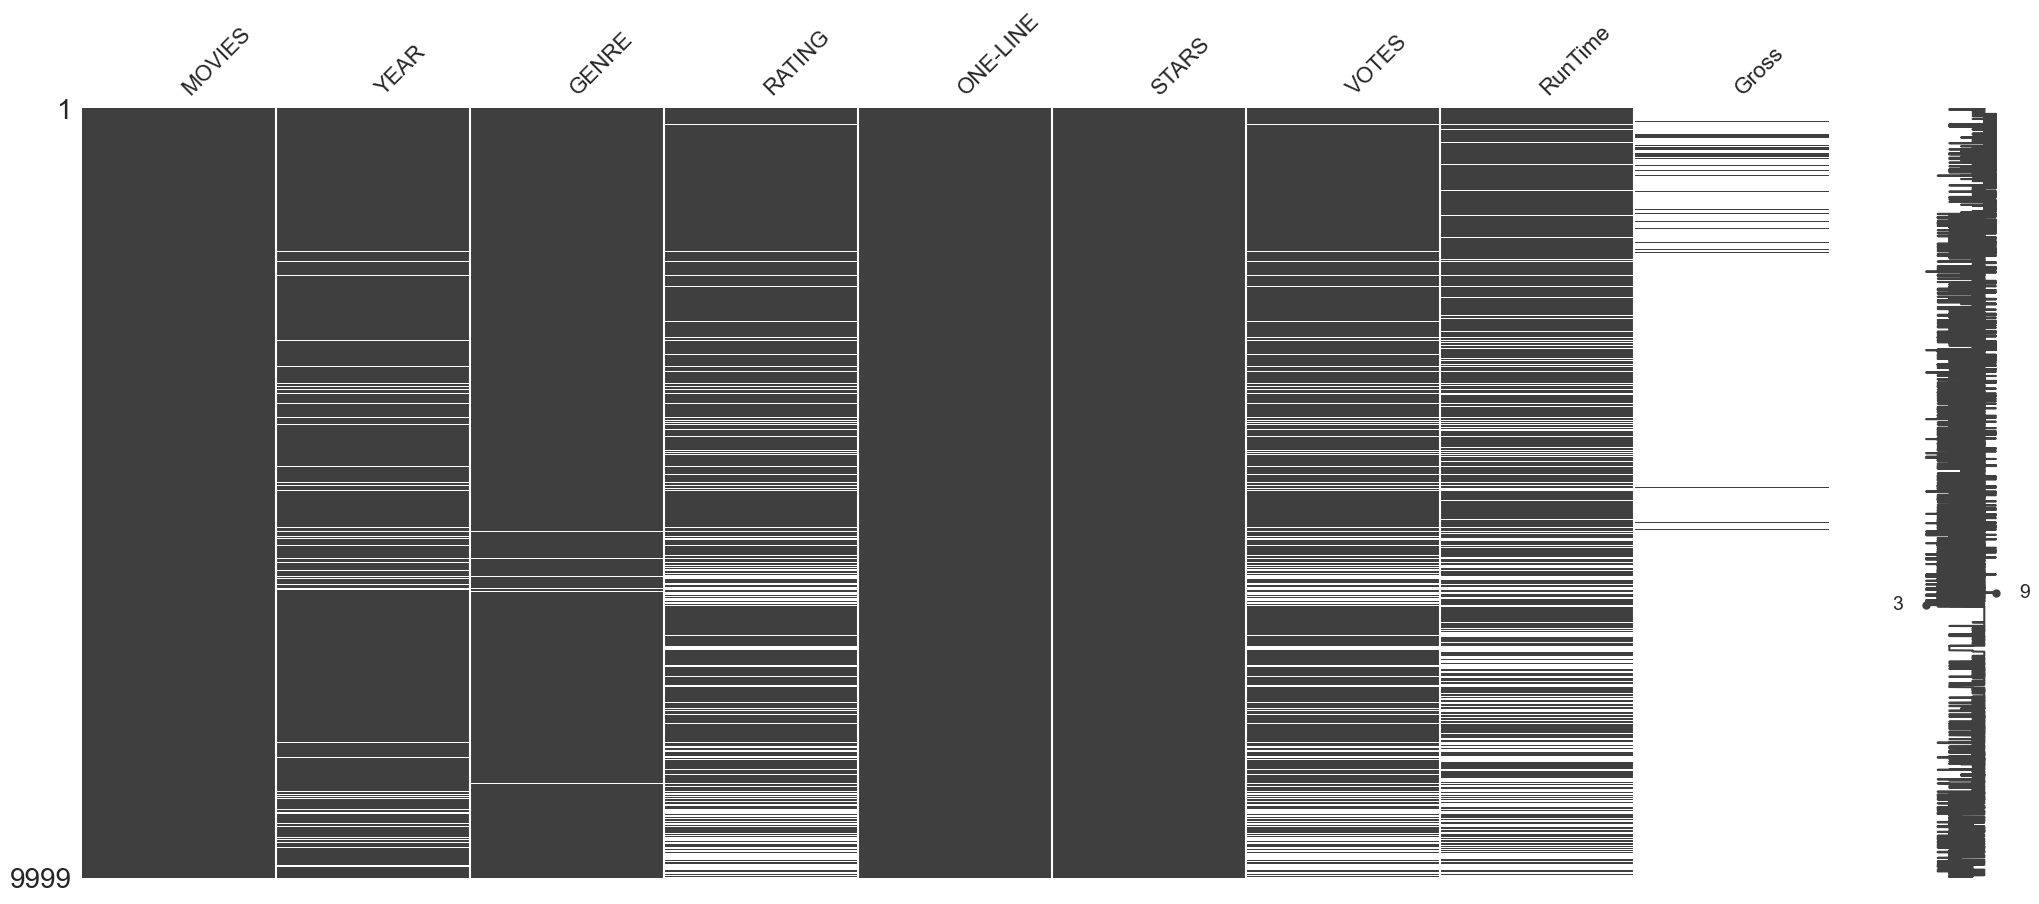

<Figure size 1500x900 with 0 Axes>

In [321]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

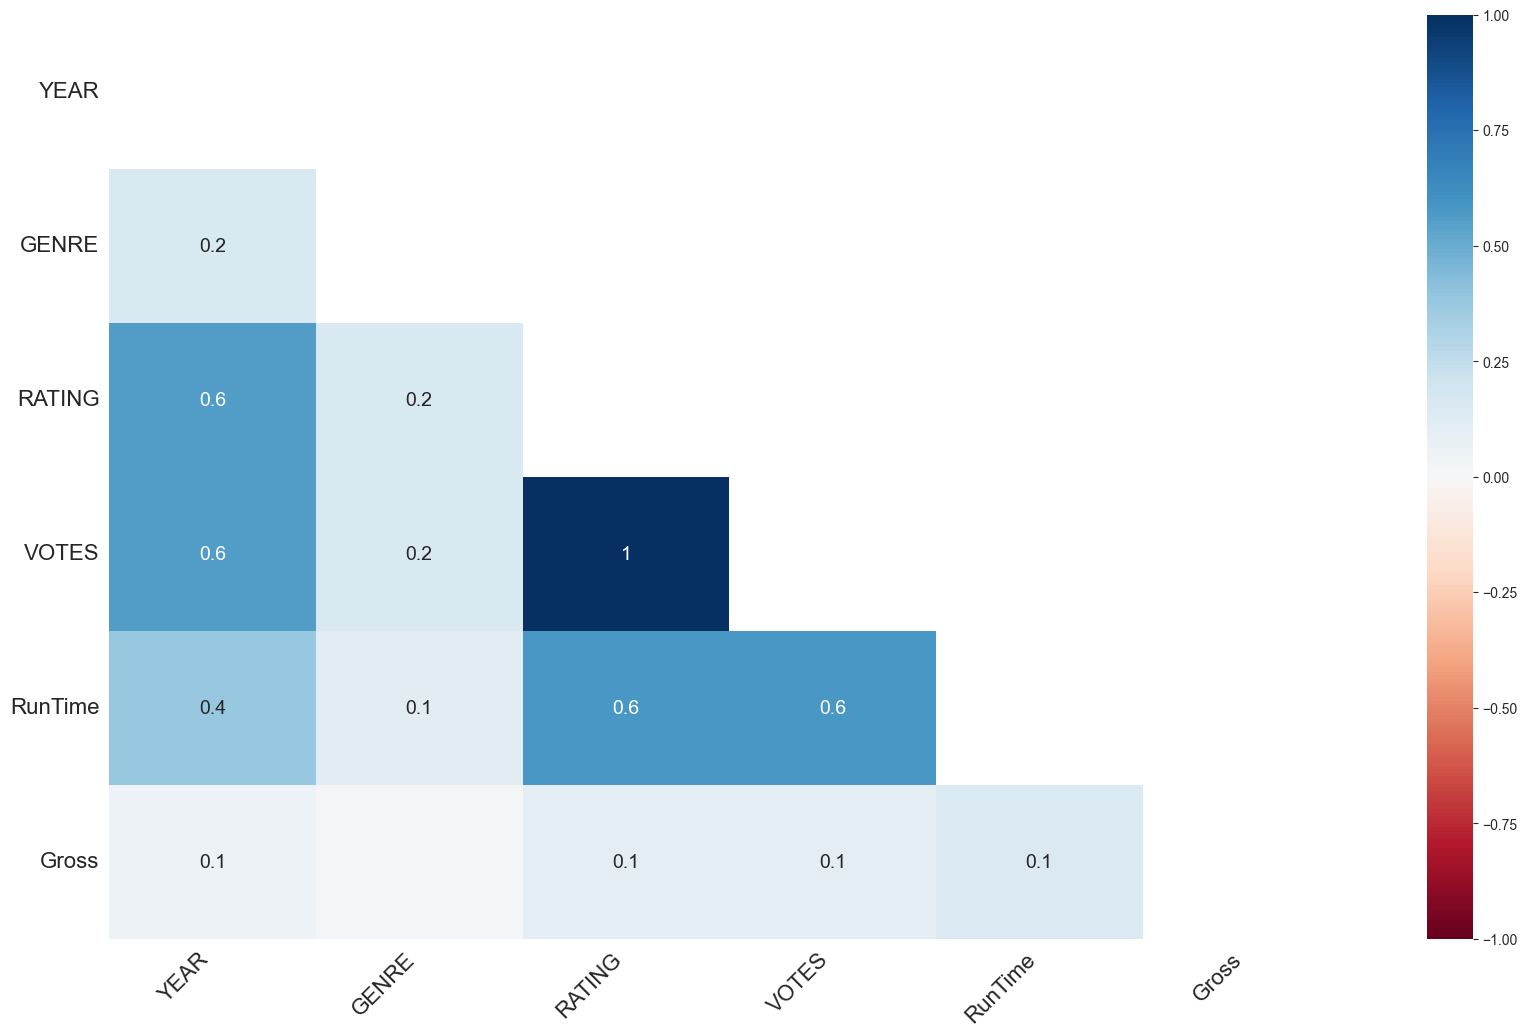

In [129]:
msno.heatmap(df, labels = True)

<Axes: >

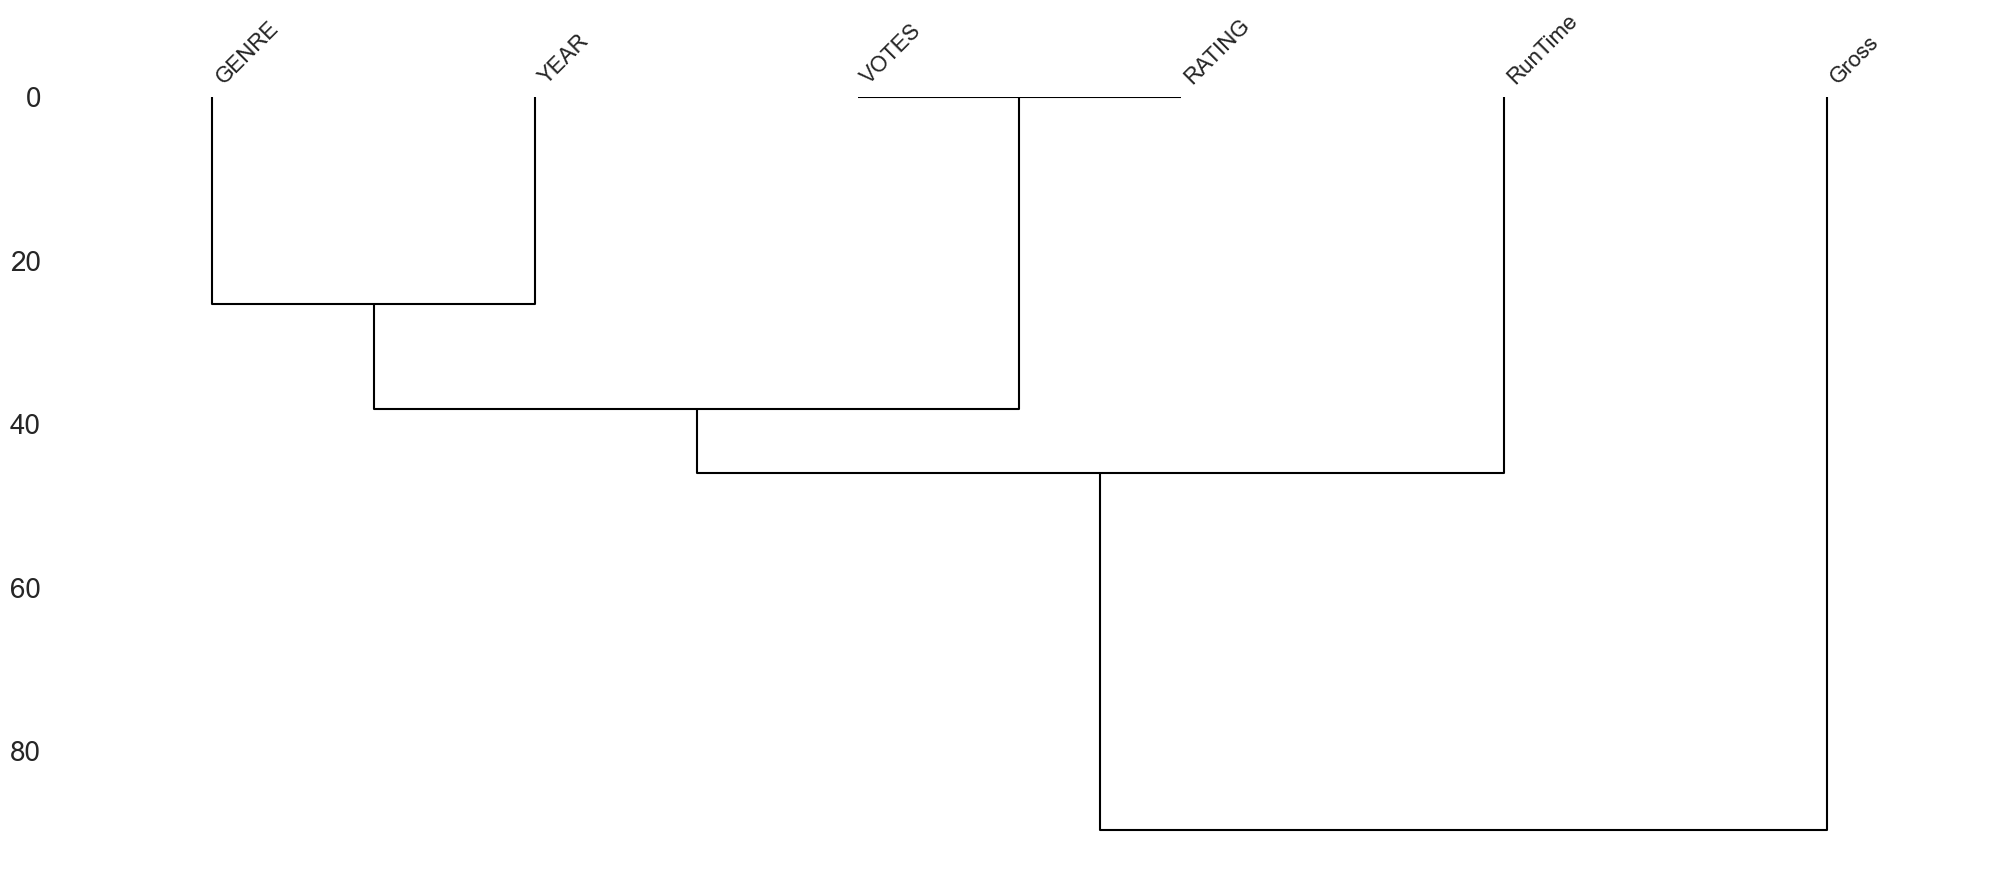

In [130]:
# Columns having missing values
missing_value_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_value_columns])

In [133]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

In [134]:
missing_percent = get_numerical_summary(df)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)
Gross : 9539 (95.4%)


In [135]:
def get_missing_values(df):
    null_count = 0
    for col in df.columns:
        null_count += df[col].isnull().sum()
    return null_count


get_missing_values(df)

np.int64(16861)

## On commence à modifier le fichier sur une copie

In [322]:
df = pd.read_csv("../../data/movies.csv")
df_temp = df.copy()

In [323]:
def get_numerical_summary(df_temp):
    total = df_temp.shape[0]
    missing_values_columns = [col for col in df_temp.columns if df_temp[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df_temp[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

missing_percent = get_numerical_summary(df_temp)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)
Gross : 9539 (95.4%)


In [324]:
def get_missing_values(df_temp):
    null_count = 0
    for col in df_temp.columns:
        null_count += df_temp[col].isnull().sum()
    return null_count


get_missing_values(df_temp)

np.int64(16861)

In [325]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


## On retire les colonnes qui contiennent un pourcentage élevé de valeur null

In [326]:
# Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil.
ATTRIBUTE_THRESHOLD = 30

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)
df_temp.info()
## del df_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


## On calcul le nombre de colonne null dans une ligne et on supprime les lignes avec plus de 3 colonnes vide

In [327]:
# Obtenir le nombre de manquants pour chaque échantillon 
# La fonction créé pour chaque ligne une colonne qui est incrémenté par le nombre de colonne vide de la ligne
for idx in range(df_temp.shape[0]): # Calcul le nombre de ligne  # : = toute les colonnes / idx = la ligne
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum() 
    

In [328]:
# Seuil pour supprimer les échantillons dont les valeurs manquantes sont supérieures au seuil.
SAMPLE_THRESHOLD = 3

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)
# df_temp[df_temp['missing_count'] = une valeur 
# Liste df.temp.drop([0,x1],axis = 0)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 9999
Samples After Removal : 8405


In [329]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 9979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         8405 non-null   object 
 1   YEAR           8405 non-null   object 
 2   GENRE          8394 non-null   object 
 3   RATING         8179 non-null   float64
 4   ONE-LINE       8405 non-null   object 
 5   STARS          8405 non-null   object 
 6   VOTES          8179 non-null   object 
 7   RunTime        7012 non-null   float64
 8   missing_count  8405 non-null   float64
dtypes: float64(3), object(6)
memory usage: 656.6+ KB


## On supprime les lignes avec un genre null 

In [330]:


# Création de la colonne 'missing_genre' qui indique True si 'GENRE' est vide, False sinon
df_temp['missing_genre'] = df_temp['GENRE'].isnull()

# Afficher le nombre d'échantillons avant suppression
print("Samples Before Removal : {}".format(df_temp.shape[0]))

# Suppression des lignes où 'missing_genre' est True
df_temp = df_temp[df_temp['missing_genre'] == False]

# Afficher le nombre d'échantillons après suppression
print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 8405
Samples After Removal : 8394


In [331]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8394 entries, 0 to 9979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         8394 non-null   object 
 1   YEAR           8394 non-null   object 
 2   GENRE          8394 non-null   object 
 3   RATING         8168 non-null   float64
 4   ONE-LINE       8394 non-null   object 
 5   STARS          8394 non-null   object 
 6   VOTES          8168 non-null   object 
 7   RunTime        7005 non-null   float64
 8   missing_count  8394 non-null   float64
 9   missing_genre  8394 non-null   bool   
dtypes: bool(1), float64(3), object(6)
memory usage: 664.0+ KB


# MAJ des valeurs manquantes

## RUNTIME

In [332]:
#Float
mean_runtime = df_temp['RunTime'].mean()
df_temp['RunTime'] = df_temp['RunTime'].fillna(mean_runtime)
print(f"Moyenne de la colonne 'RunTime': {mean_runtime}")
df_temp.RunTime.value_counts()

Moyenne de la colonne 'RunTime': 68.75231977159171


RunTime
68.75232     1389
24.00000      354
60.00000      284
30.00000      217
23.00000      183
             ... 
173.00000       1
211.00000       1
373.00000       1
146.00000       1
165.00000       1
Name: count, Length: 262, dtype: int64

## RATING / VOTES

In [333]:
# Création de la colonne 'missing_genre' qui indique True si 'GENRE' est vide, False sinon
df_temp['missing_votes'] = df_temp['VOTES'].isnull()
df_temp['missing_rating'] = df_temp['RATING'].isnull()

# Afficher le nombre d'échantillons avant suppression
print("Samples Before Removal : {}".format(df_temp.shape[0]))

# Suppression des lignes où 'missing_genre' est True
df_temp = df_temp[df_temp['missing_votes'] == False]
df_temp = df_temp[df_temp['missing_rating'] == False]

# Afficher le nombre d'échantillons après suppression
print("Samples After Removal : {}".format(df_temp.shape[0]))

## df_temp.VOTES.value_counts()

Samples Before Removal : 8394
Samples After Removal : 8168


## Suppression des colonnes créés

In [334]:
df_temp.drop(columns=['missing_count'], inplace=True)
df_temp.drop(columns=['missing_genre'], inplace=True)
df_temp.drop(columns=['missing_rating'], inplace=True)
df_temp.drop(columns=['missing_votes'], inplace=True)

## Test pour vérifier qu'il n'y a plus de valeurs null

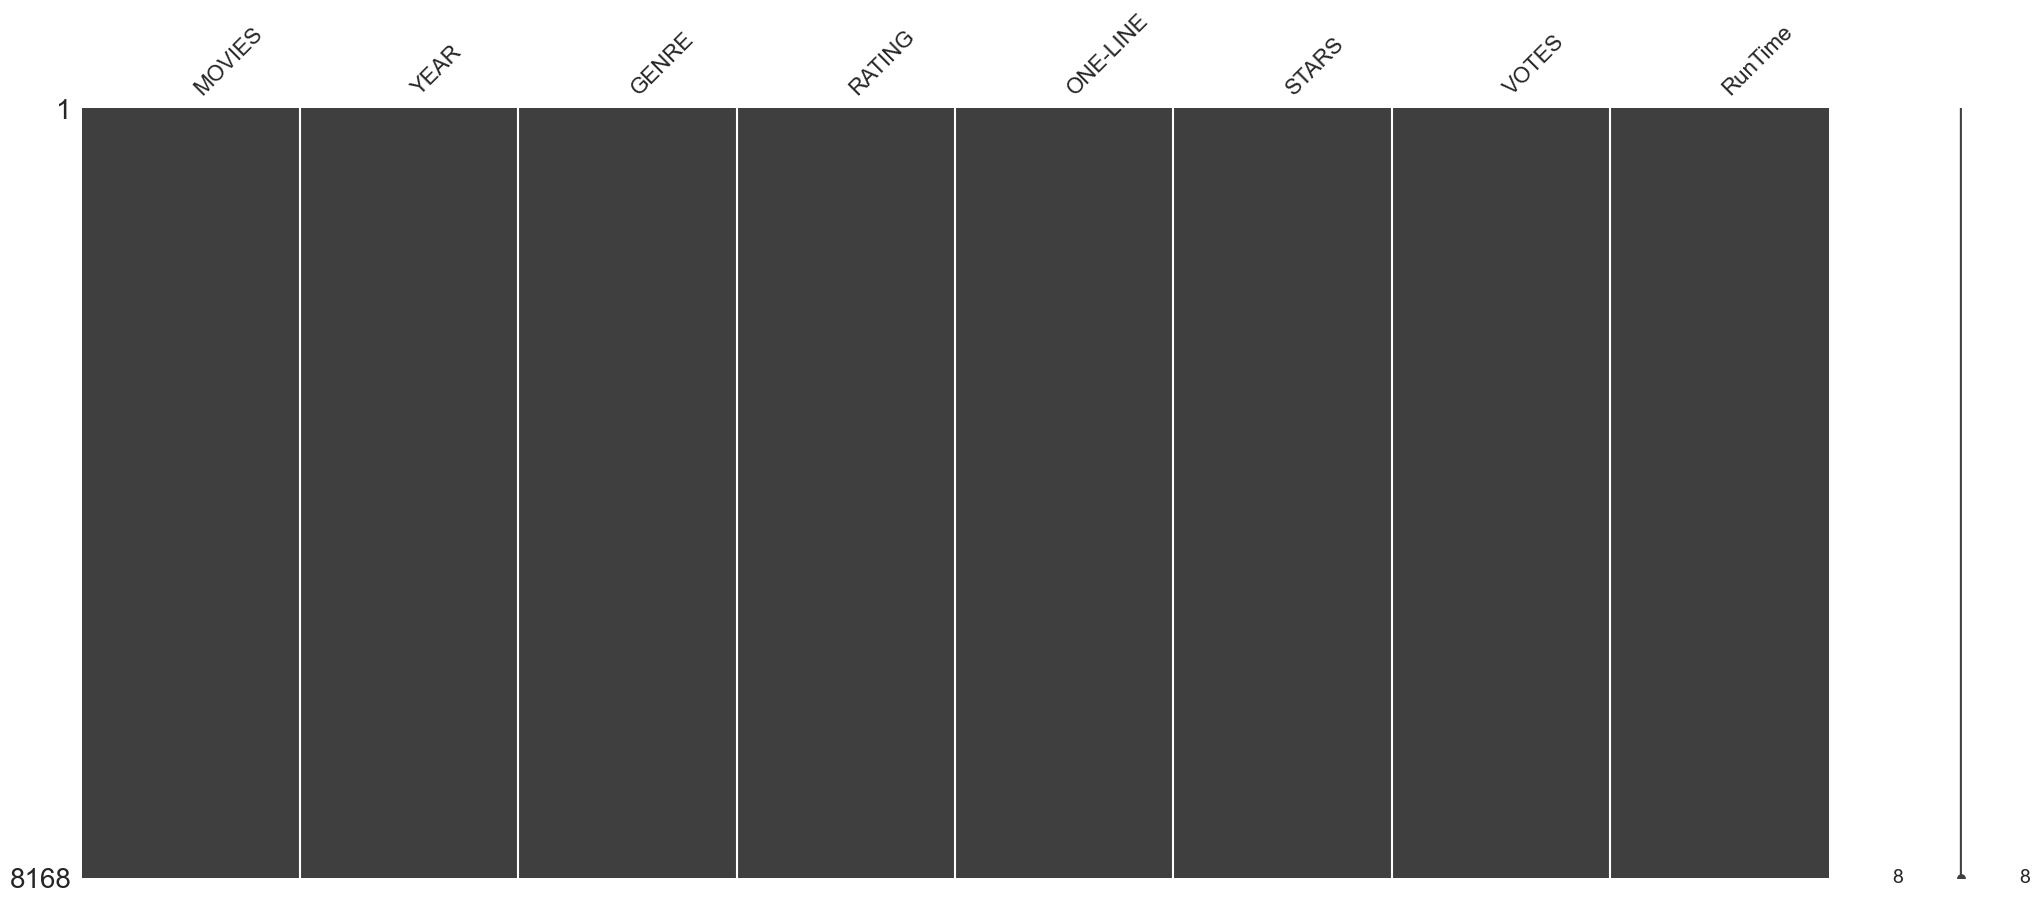

<Figure size 1500x900 with 0 Axes>

In [335]:
msno.matrix(df_temp)
plt.figure(figsize = (15,9))
plt.show()

In [336]:
missing_percent = get_numerical_summary(df_temp)

In [337]:
import seaborn as sns

## BOXPLOT

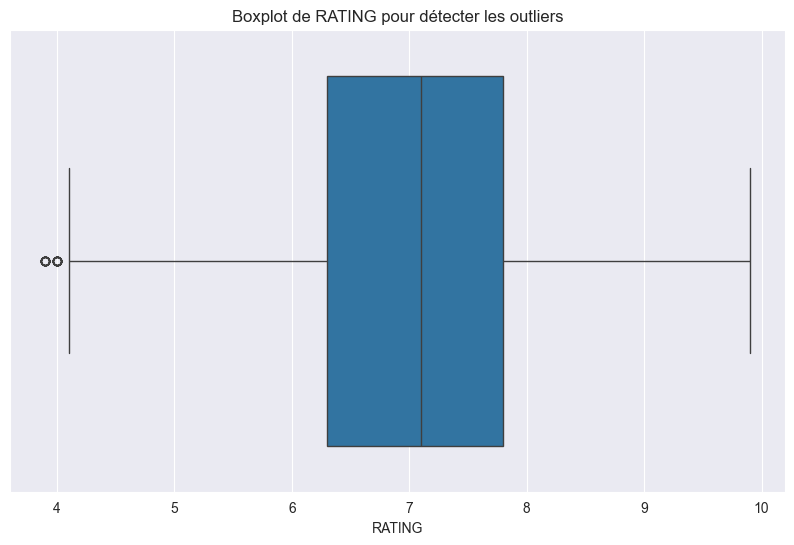

In [343]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_temp['RATING'])
plt.title("Boxplot de RATING pour détecter les outliers")
plt.xlabel("RATING")
plt.show()

## SCATTER PLOT

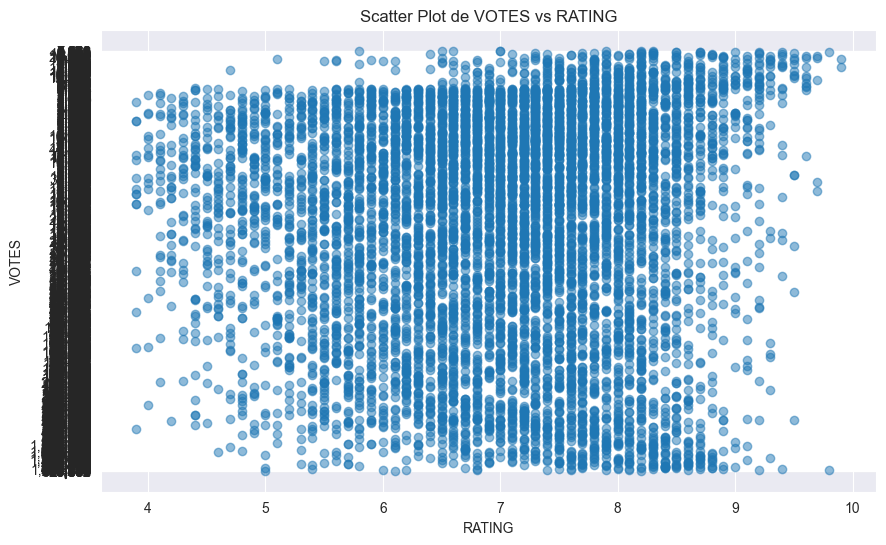

In [344]:
# Exemple de Scatter Plot pour visualiser 'LoanAmount' par rapport au 'ApplicantIncome'
plt.figure(figsize=(10, 6))
plt.scatter(df_temp['RATING'], df_temp['VOTES'], alpha=0.5)
plt.title("Scatter Plot de VOTES vs RATING")
plt.xlabel("RATING")
plt.ylabel("VOTES")
plt.show()

## HISTOGRAMME

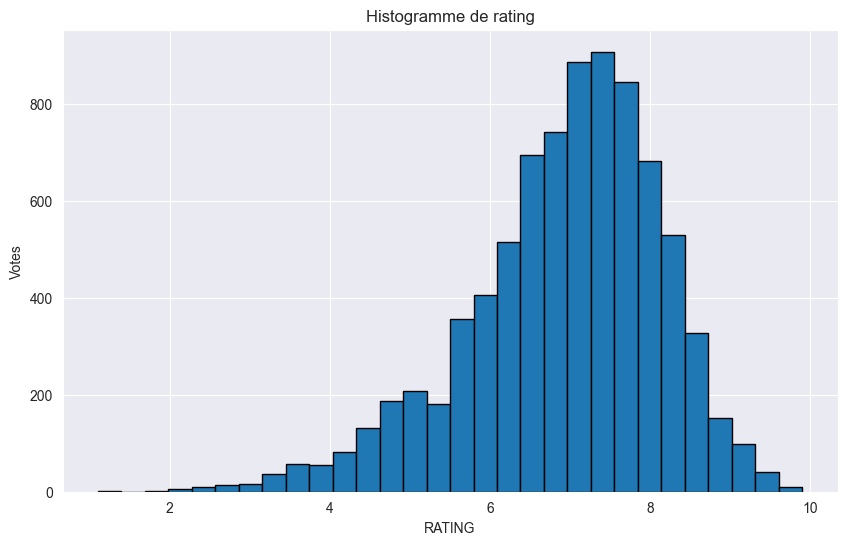

In [345]:
# Exemple d'Histogramme pour visualiser la distribution de 'LoanAmount'
plt.figure(figsize=(10, 6))
plt.hist(df['RATING'], bins=30, edgecolor='black')
plt.title("Histogramme de rating")
plt.xlabel("RATING")
plt.ylabel("Votes")
plt.show()

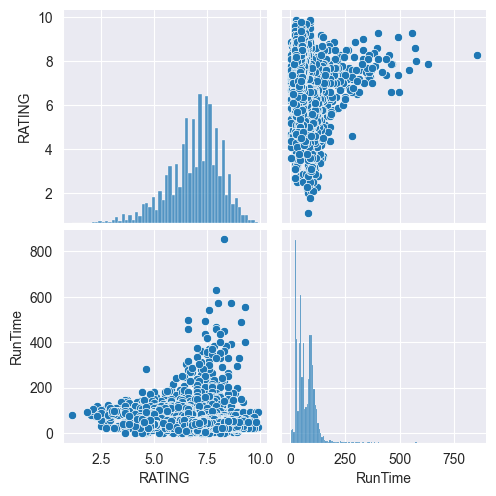

In [341]:
# Exemple de Pairplot pour voir les relations entre plusieurs variables
sns.pairplot(df[['RATING', 'VOTES', 'RunTime']])
plt.show()

## SUPRESSION OUTLIERS

In [342]:
# Exemple de suppression des outliers
Q1 = df_temp['RATING'].quantile(0.25)
Q3 = df_temp['RATING'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Supprimer les outliers
df_temp = df_temp[(df_temp['RATING'] >= lower_limit) & (df_temp['RATING'] <= upper_limit)]

## TRANSFORMATION DE DONNEES

In [288]:
# # Exemple de transformation logarithmique
# df_temp['RATING'] = df_temp['RATING'].apply(lambda x: np.log(x) if x > 0 else 0)

## IMPUTATION DES OUTLIERS

In [ ]:
# # Exemple d'imputation des outliers par la médiane
# median_value = df_temp['RATING'].median()
# df_temp['RATING'] = df_temp['RATING'].apply(lambda x: median_value if (x < lower_limit or x > upper_limit) else x)

In [346]:
df_temp.to_csv("../../data/movieresult.csv", index=False)


Moyenne de la colonne 'RunTime': 68.75231977159171


RunTime
68.75232     1389
24.00000      354
60.00000      284
30.00000      217
23.00000      183
             ... 
173.00000       1
211.00000       1
373.00000       1
146.00000       1
165.00000       1
Name: count, Length: 262, dtype: int64